In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('C:\\Users\\deeks\\Documents\\rossmann-store-sales')

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,d,1
1,2,5,31/07/2015,6064,625,1,1,d,1
2,3,5,31/07/2015,8314,821,1,1,d,1
3,4,5,31/07/2015,13995,1498,1,1,d,1
4,5,5,31/07/2015,4822,559,1,1,d,1


In [5]:
train.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,29/04/2013,NaN,NaN,NaN,NaN,d,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [6]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
train.shape

(1017209, 9)

In [8]:
train['StateHoliday'].value_counts()

d    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

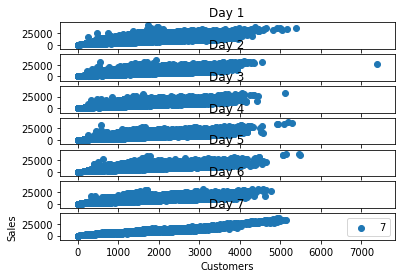

In [9]:
f, ax = plt.subplots(7, sharex=True, sharey=True)
for i in range(1, 8):
    mask = train[train['DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [10]:
# Extracting data where stores were open
sales_when_store_open = train[train['Open'] == 1]

# Average sales by each Storeb
mean_sales = sales_when_store_open['Sales'].groupby(sales_when_store_open.Store).aggregate(np.mean)

# Average Customers per day in each store
customers_per_day = train['Customers'].groupby(train.DayOfWeek).aggregate(np.mean)

# Average Sales per day in each store
sales_per_day = train['Sales'].groupby(train.DayOfWeek).aggregate(np.mean)

# Average Sales per day in a week with respect to 'Open' stores
normalized_sales_per_day = sales_when_store_open['Sales'].groupby(sales_when_store_open.DayOfWeek).aggregate(np.mean)

# Average Count of customers per day with respect to 'Open' stores
normalized_customer_count = sales_when_store_open['Customers'].groupby(sales_when_store_open.DayOfWeek).aggregate(np.mean)

### Average Sales and customers per day

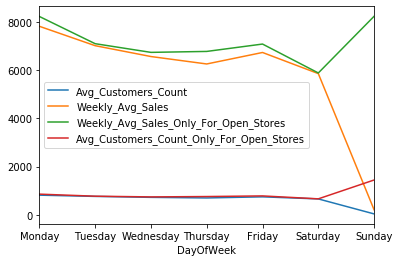

In [11]:

# Plot
x_axes = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(1, 1)

plt.xticks([1,2,3,4,5,6,7], x_axes)

#Renaming names of series
customers_per_day.name = 'Avg_Customers_Count'
sales_per_day.name = 'Weekly_Avg_Sales'
normalized_sales_per_day.name = 'Weekly_Avg_Sales_Only_For_Open_Stores'
normalized_customer_count.name = 'Avg_Customers_Count_Only_For_Open_Stores'

customers_per_day.plot(kind='line', legend=True)
sales_per_day.plot(kind='line', legend=True)
normalized_sales_per_day.plot(kind='line', legend=True)
normalized_customer_count.plot(kind='line', legend=True)

plt.savefig('eda_1.png')

### Average Sales by with/without promos

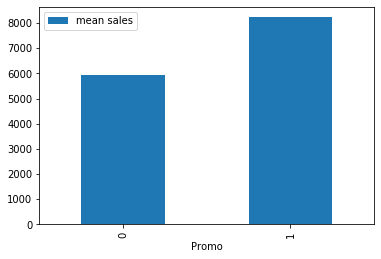

In [12]:
sales_by_promo = sales_when_store_open['Sales'].groupby(sales_when_store_open.Promo).aggregate(np.mean)
cust_by_promo = sales_when_store_open['Customers'].groupby(sales_when_store_open.Promo).aggregate(np.mean)
sales_by_promo.plot(kind='bar', label='mean sales')
plt.legend()
plt.savefig('eda_train_1.png')

### Average Customers by with/without promos

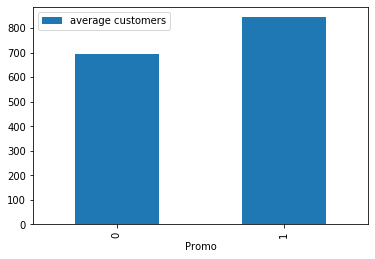

In [13]:
cust_by_promo.plot(kind='bar', label='average customers')
plt.legend()
plt.savefig('eda_train_2.png')

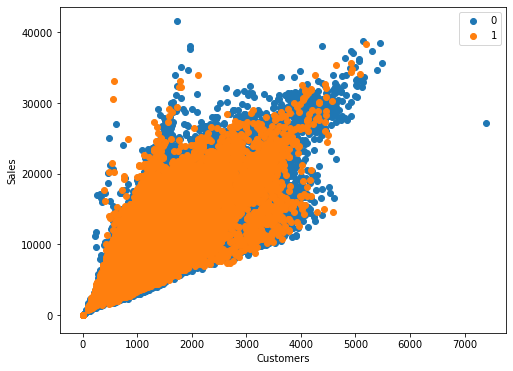

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize = (8,6))
for i in [0, 1]:
    data = train[train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()
plt.savefig('eda_train_3.png')

#### It appears that school holiday doesn't seem to have much of an impact.

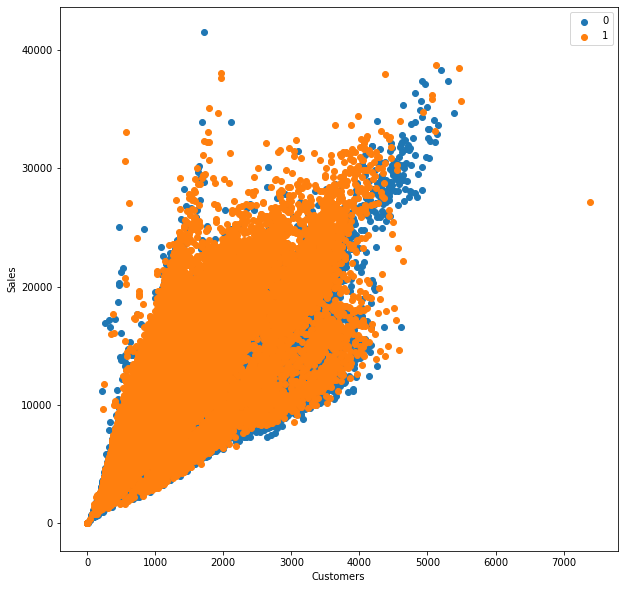

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize = (10,10))
for i in [0, 1]:
    data = train[train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()
plt.savefig('eda_train_3.png')

#### It appears that promos may have some different effects for two groups of stores.

In [16]:
store = pd.read_csv("store.csv")

In [17]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
store.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

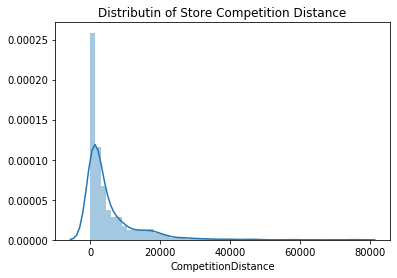

In [19]:
# Distribution of competition distance
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [20]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
store_eda = pd.merge(avg_store.reset_index(), store, on='Store')

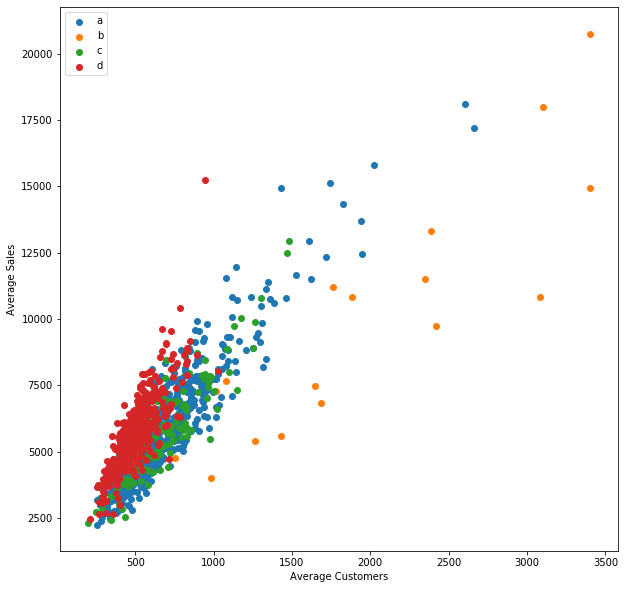

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize = (10,10))
for i in ['a', 'b', 'c', 'd']:
    data = store_eda[store_eda['StoreType'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()
plt.savefig('eda_store_1.png')

#### From above plot we are able to tell that certain store types' customers spend less, like 'b'

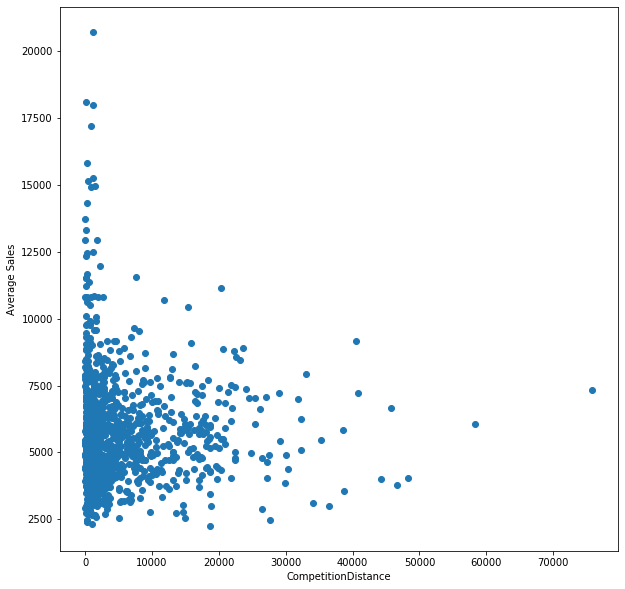

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize = (10,10))
store["CompetitionDistance"].fillna(-1)
plt.scatter(store_eda['CompetitionDistance'], store_eda['AvgSales'])

plt.xlabel('CompetitionDistance')
plt.ylabel('Average Sales')
plt.show()
plt.savefig('eda_store_2.png')

#### Who knew? Closer competition means more profits.

In [23]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [24]:
categorical_level_unique = store['PromoInterval'].unique()

In [25]:
categorical_level_mapping = {PromoInterval: idx for idx, PromoInterval in enumerate(categorical_level_unique, 1)}

In [26]:
categorical_level_mapping

{nan: 1, 'Jan,Apr,Jul,Oct': 2, 'Feb,May,Aug,Nov': 3, 'Mar,Jun,Sept,Dec': 4}

In [27]:
store['PromoInterval'] = store['PromoInterval'].map(categorical_level_mapping)

In [28]:
store['PromoInterval'] = store['PromoInterval'].replace(1, np.nan)

In [29]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,2.0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [30]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [31]:
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])

In [32]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                  0
dtype: int64

In [33]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [34]:
data = pd.merge(train, store, how = 'left' , on = 'Store')

In [35]:
raw_test = pd.read_csv('test.csv')
raw_test['Open'].fillna(raw_test['Open'].median(), inplace = True)
test = pd.merge(raw_test, store, how = 'left' , on = 'Store')

In [36]:
test.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                    0
dtype: int64

In [37]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,d,1,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2.0
1,2,5,31/07/2015,6064,625,1,1,d,1,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2.0
2,3,5,31/07/2015,8314,821,1,1,d,1,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,2.0
3,4,5,31/07/2015,13995,1498,1,1,d,1,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,2.0
4,5,5,31/07/2015,4822,559,1,1,d,1,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,2.0


In [38]:
print(f'size of "train" df without merging: {train.shape}')
print(f'size of "store" df without merging: {store.shape}')
print(f'size of "final" df after merging: {data.shape}')
print(f'size of "test" df after merging: {test.shape}')

size of "train" df without merging: (1017209, 10)
size of "store" df without merging: (1115, 10)
size of "final" df after merging: (1017209, 19)
size of "test" df after merging: (41088, 17)


In [39]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,d,1,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2.0
1,2,5,31/07/2015,6064,625,1,1,d,1,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2.0
2,3,5,31/07/2015,8314,821,1,1,d,1,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,2.0
3,4,5,31/07/2015,13995,1498,1,1,d,1,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,2.0
4,5,5,31/07/2015,4822,559,1,1,d,1,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,2.0


In [40]:
def feature_engg(data):
    mappings = {'0':"0", 'a':"1", 'b':"2", 'c':"3", 'd':"4"}
    mappings1 = {'0':"0", 'Jan,Apr,Jul,Oct':"1", 'Feb,May,Aug,Nov':"2", 'Mar,Jun,Sept,Dec':"3"}
    data["StoreType"].replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)

    data['Year'] = pd.DatetimeIndex(data['Date']).year
    data['Month'] = pd.DatetimeIndex(data['Date']).month
    data['Day'] = pd.DatetimeIndex(data['Date']).day
    data['WeekOfYear'] = pd.DatetimeIndex(data['Date']).weekofyear
    data['WeekDay_name'] = pd.DatetimeIndex(data['Date']).weekday_name
    mappings2 = {'Sunday':"0", 'Monday':"1", 'Tuesday':"2", 'Wednesday':"3", 'Thursday':"4", 'Friday':"5", 'Saturday':"6"}
    data["WeekDay_name"].replace(mappings2, inplace=True)
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
    data['PrvsHoliday'] = np.where((data["StateHoliday"].shift(1)==1) | (data["SchoolHoliday"].shift(1)==1),1,0)
    data['NxtHoliday'] = np.where((data["StateHoliday"].shift(-1)==1) | (data["SchoolHoliday"].shift(-1)==1),1,0)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data["PromoOpen"].apply(lambda x: x if x > 0 else 0)
    data.loc[data.Promo2SinceYear == 0, 'PromoOpen'] = 0
    
    return data

In [41]:
train_1 = feature_engg(data)
test = feature_engg(test)

In [42]:
train_1.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
SalesPerCustomer             float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                     int64
WeekDay_name                  object
CompetitionOpen              float64
PrvsHoliday                    int32
NxtHoliday                     int32
P

In [43]:
def type_conv(df):
    df['Assortment'] = df['Assortment'].astype('category')
    df['StoreType'] = df['StoreType'].astype('category')
    df['PromoInterval']= df['Promo2'].astype('category')
    df['WeekDay_name']= df['WeekDay_name'].astype('int32')
    df['StateHoliday']= df['StateHoliday'].astype('int32')
    return df

In [44]:
train_1 = type_conv(train_1)
test = type_conv(test)

### Trend Lines on 'Sales' w.r.t 'Year' & 'Month'

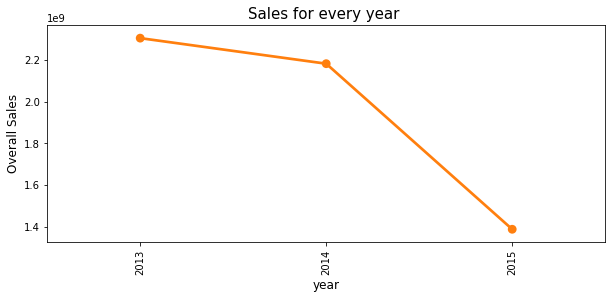

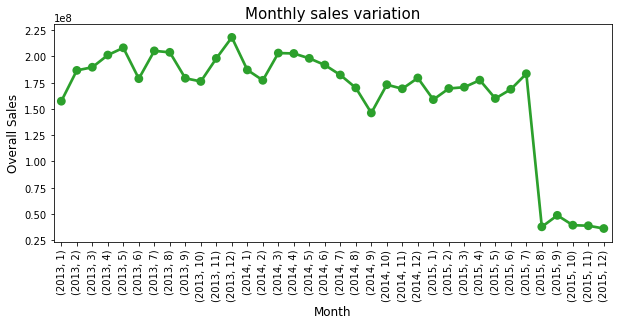

In [70]:
color = sns.color_palette()
temp=train_1.groupby('Year')['Sales'].sum()
plt.figure(figsize=(10,4))
sns.pointplot(temp.index,temp.values, alpha=0.8, color=color[1],)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.title('Sales for every year ', fontsize=15)
plt.xticks(rotation='vertical')

# month over month sales
temp=train_1.groupby(['Year','Month'])['Sales'].sum()
plt.figure(figsize=(10,4))
sns.pointplot(temp.index,temp.values, alpha=0.8, color=color[2],)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Monthly sales variation', fontsize=15)
plt.xticks(rotation='vertical')

plt.show()
plt.show()

In [46]:
train_1.dtypes

Store                           int64
DayOfWeek                       int64
Date                           object
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                    int32
SchoolHoliday                   int64
SalesPerCustomer              float64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
Year                            int64
Month                           int64
Day                             int64
WeekOfYear                      int64
WeekDay_name                    int32
CompetitionOpen               float64
PrvsHoliday                     int32
NxtHoliday  

In [47]:
train_1 = train_1.drop(["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Customers","Promo2SinceWeek","Promo2SinceYear","Date","Open","SalesPerCustomer"],axis=1)
test = test.drop(["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","Date","Id","Open"],axis=1)

In [48]:
print(f'shape of train {train_1.shape}')
print(f'shape of test {test.shape}')

shape of train (1017209, 20)
shape of test (41088, 19)


In [49]:
df = pd.get_dummies(train_1[["StoreType","Assortment",
                          "PromoInterval"]],prefix_sep="_",drop_first=True)
df1 = pd.get_dummies(test[["StoreType","Assortment",
                          "PromoInterval"]],prefix_sep="_",drop_first=True)

In [50]:
train_1 = pd.concat([train_1,df],axis=1)
test = pd.concat([test,df1],axis=1)

In [51]:
train_1 = train_1.drop(["StoreType","Assortment","PromoInterval"],axis=1)
test = test.drop(["StoreType","Assortment","PromoInterval"],axis=1)

In [52]:
print(f'Final shape of train {train_1.shape}')
print(f'Final shape of test {test.shape}')

Final shape of train (1017209, 23)
Final shape of test (41088, 22)


In [53]:
X = train_1.drop(['Sales'],axis = 1)
y = np.log(train_1['Sales'] + 1)

In [54]:
X.dtypes

Store                    int64
DayOfWeek                int64
Promo                    int64
StateHoliday             int32
SchoolHoliday            int64
CompetitionDistance    float64
Promo2                   int64
Year                     int64
Month                    int64
Day                      int64
WeekOfYear               int64
WeekDay_name             int32
CompetitionOpen        float64
PrvsHoliday              int32
NxtHoliday               int32
PromoOpen              float64
StoreType_2              uint8
StoreType_3              uint8
StoreType_4              uint8
Assortment_2             uint8
Assortment_3             uint8
PromoInterval_1          uint8
dtype: object

In [55]:
X.isnull().sum()

Store                  0
DayOfWeek              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
CompetitionDistance    0
Promo2                 0
Year                   0
Month                  0
Day                    0
WeekOfYear             0
WeekDay_name           0
CompetitionOpen        0
PrvsHoliday            0
NxtHoliday             0
PromoOpen              0
StoreType_2            0
StoreType_3            0
StoreType_4            0
Assortment_2           0
Assortment_3           0
PromoInterval_1        0
dtype: int64

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scale = scaler.transform(test)

In [56]:
X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size = 0.3, random_state = 126)

## MODEL BUILDING

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_eval)
train_pred = lin_reg.predict(X_train)

In [58]:
print(f'RMSE for train set with linear regression: {np.sqrt(mean_squared_error(y_train , train_pred))}')
print(f'RMSE for validation with linear regression: {np.sqrt(mean_squared_error(y_eval , y_pred_linear))}')
print(f'R-square for validation in linear regression: {r2_score(y_eval, y_pred_linear)}')
print(f'R-square for train set in linear regression: {r2_score(y_train, train_pred)}')

RMSE for train set with linear regression: 2.004095701657737
RMSE for validation with linear regression: 1.9988355179153638
R-square for validation in linear regression: 0.6348962099922618
R-square for train set in linear regression: 0.6342322751875119


In [59]:
from sklearn.tree import DecisionTreeRegressor
# The below parameters are found by doing Grid Search on it
dt = DecisionTreeRegressor(criterion='mse',max_depth=2,max_leaf_nodes=2,min_samples_leaf=2,min_samples_split=2)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_eval)
train_pred_dt = dt.predict(X_train)

In [60]:
from sklearn.metrics import r2_score , mean_squared_error
# R-square
print(f'R-square for train with tree: {r2_score(y_train , train_pred_dt)}')
print(f'R-square for validation with tree: {r2_score(y_eval , y_pred_dt)}')
# MSE
print(f'MSE for train with tree: {np.sqrt(mean_squared_error(y_train , train_pred_dt))}')
print(f'MSE for validation with tree: {np.sqrt(mean_squared_error(y_eval , y_pred_dt))}')

R-square for train with tree: 0.7515548349088375
R-square for validation with tree: 0.7538006809291129
MSE for train with tree: 1.6516995135774253
MSE for validation with tree: 1.6413919950070008


In [61]:
y_train.head()

245099    9.468619
983910    8.591187
795554    8.759982
946283    9.073948
358057    8.838407
Name: Sales, dtype: float64

In [62]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

Using TensorFlow backend.


In [63]:
model = Sequential()

In [64]:
# Initialising the ANN
model = Sequential()    
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 15)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Epoch 1/15





712046/712046 [==============================] - 10s 14us/step - loss: 23.1855 - mean_squared_error: 23.1855 - mean_absolute_error: 3.9622 - mean_absolute_percentage_error: 953037297.1740
Epoch 2/15
712046/712046 [==============================] - 10s 14us/step - loss: 13.4652 - mean_squared_error: 13.4652 - mean_absolute_error: 2.9053 - mean_absolute_percentage_error: 1173588675.4592
Epoch 3/15
712046/712046 [==============================] - 9s 12us/step - loss: 12.9976 - mean_squared_error: 12.9976 - mean_absolute_error: 2.8276 - mean_absolute_percentage_error: 1177915310.7537 6s - loss: 13.0781 - mean_squared_
Epoch 4/15
712046/712046 [==============================] - 8s 11us/step - loss: 12.7251 - mean_squared_error: 12.7251 - mean_absolute_error: 2.7828 - mean_absolute_percentage_error: 1177205314.0290
Epoch 5/15
712046/712046 [===============

In [65]:
y_pred = model.predict(X_eval)
train_pred_nn = model.predict(X_train)
# R-Square
print(f'R-square of train set: {r2_score(y_train, train_pred_nn)}')
print(f'R-square of validation set: {r2_score(y_eval, y_pred)}')
# MSE
print(f'Mean Square Error for train set: {mean_squared_error(y_train, train_pred_nn)}')
print(f'Mean Square Error for validation set: {mean_squared_error(y_eval, y_pred)}')
# MAE
print(f'Mean Absolute Error for train: {mean_absolute_error(y_train, train_pred_nn)}')
print(f'Mean Absolute Error for test: {mean_absolute_error(y_eval, y_pred)}')

R-square of train set: 0.4422078959462322
R-square of validation set: 0.4446915230597891
Mean Square Error for train set: 6.124968993313904
Mean Square Error for validation set: 6.0767599088221695
Mean Absolute Error for train: 1.8905565433381966
Mean Absolute Error for test: 1.8843139665208686


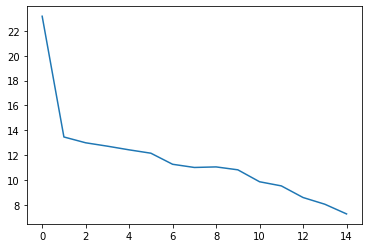

In [66]:
plt.plot(history.history['mean_squared_error'])

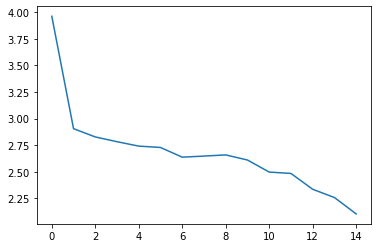

In [67]:
plt.plot(history.history['mean_absolute_error'])